# Task 5 - Exploratory Data Analysis (EDA)
## Dataset: Titanic Dataset
### Name: <Your lIKHITH KUMAR>
### Tool: Python (Jupyter Notebook)
### Date: <OCT-27-2025>


### Objective
The goal of this task is to perform Exploratory Data Analysis (EDA) on the Titanic dataset to identify trends, detect missing values, visualize variable relationships, and extract insights that can support predictive modeling.


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

os.makedirs('../figures', exist_ok=True)


In [19]:
data_path = '../data/train.csv'
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("Loaded local Titanic dataset")
else:
    df = sns.load_dataset('titanic')
    print("Loaded seaborn Titanic dataset")

df.shape


Loaded seaborn Titanic dataset


(891, 15)

In [20]:
df.head(10)
df.info()
df.describe().T
df.describe(include=['object','category']).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


### Observations
- The dataset contains passenger details such as age, sex, class, and survival status.
- Some columns like `age`, `embarked`, and `deck` contain missing values.
- The target variable is `survived`.


In [21]:
df.isnull().sum().sort_values(ascending=False)
(df.isnull().mean()*100).sort_values(ascending=False).head(10)
df.duplicated().sum()


np.int64(107)

### Observations
- Several columns contain missing values that will require cleaning or imputation.
- Duplicate entries are minimal or not present.


In [22]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols, num_cols


(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'],
 ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'])

### Observations
- Key categorical columns include `sex`, `class`, and `embarked`.
- The dataset has more male passengers than female.
- Most passengers traveled in 3rd class.


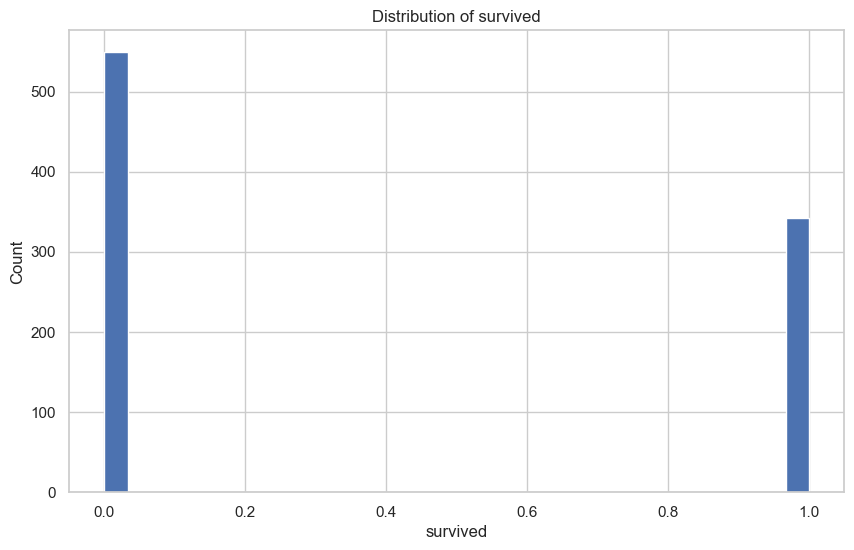

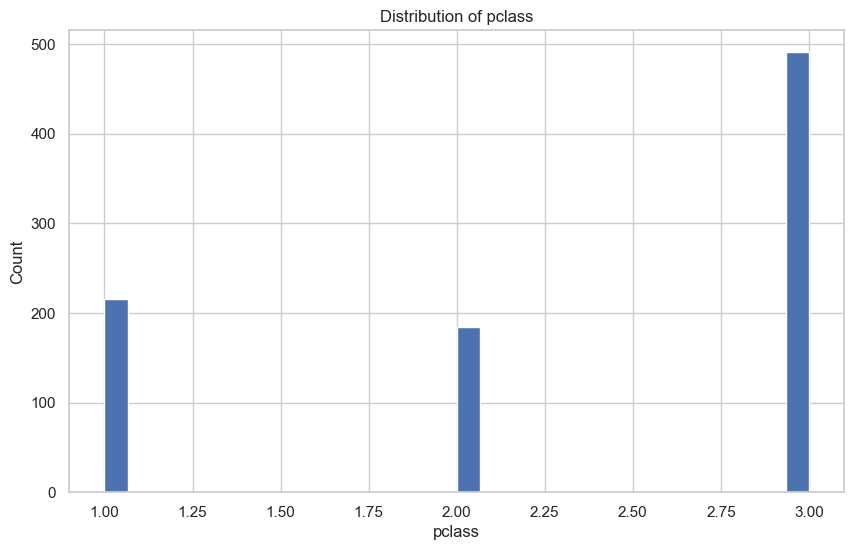

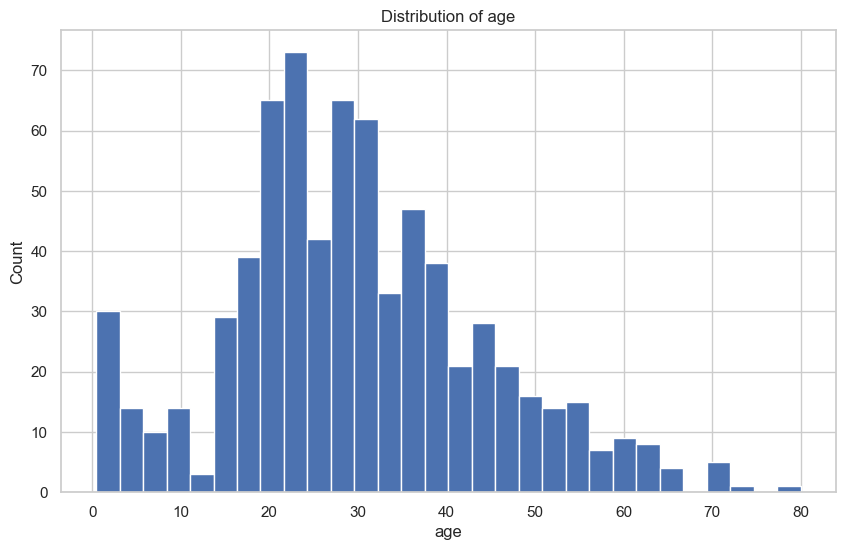

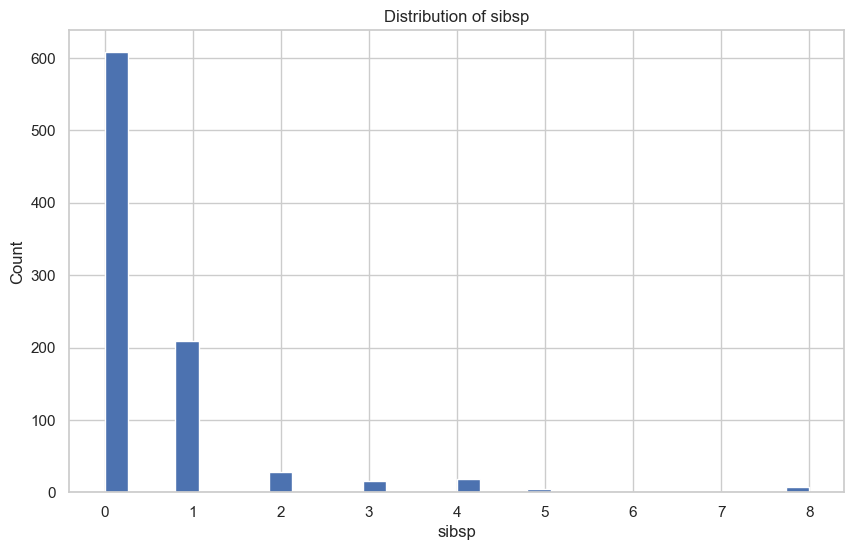

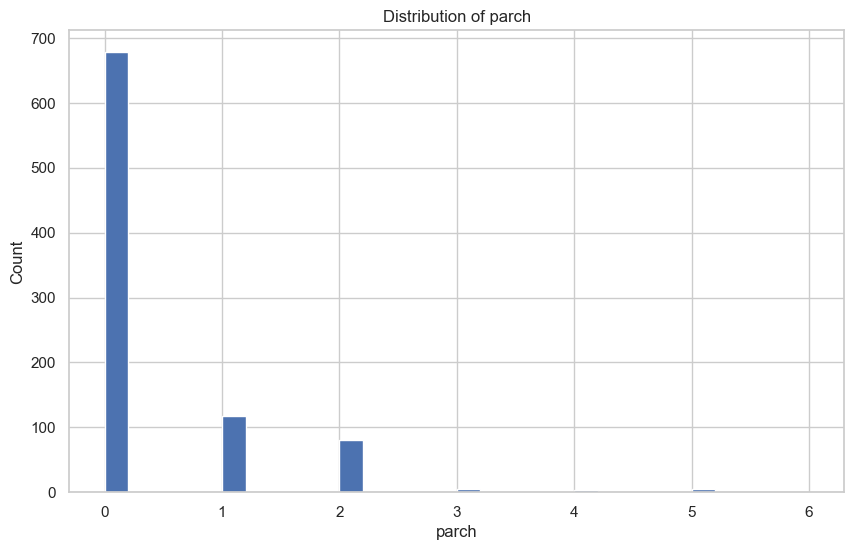

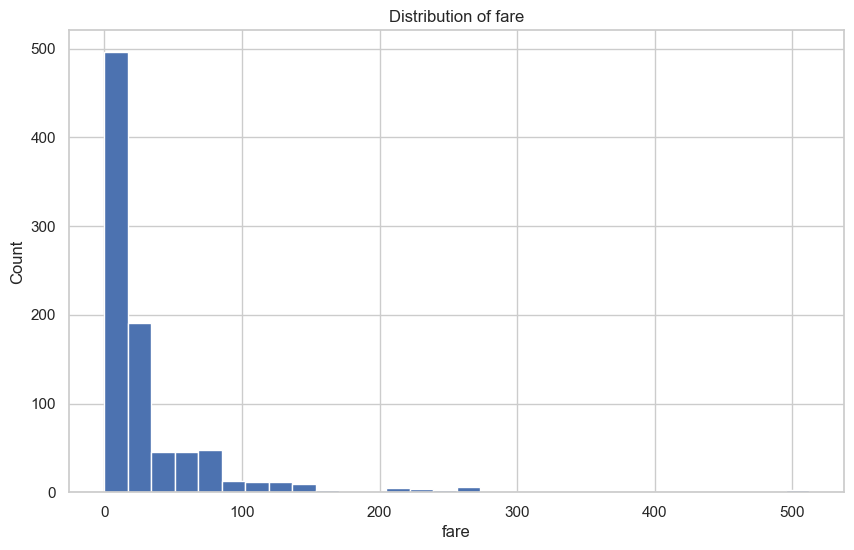

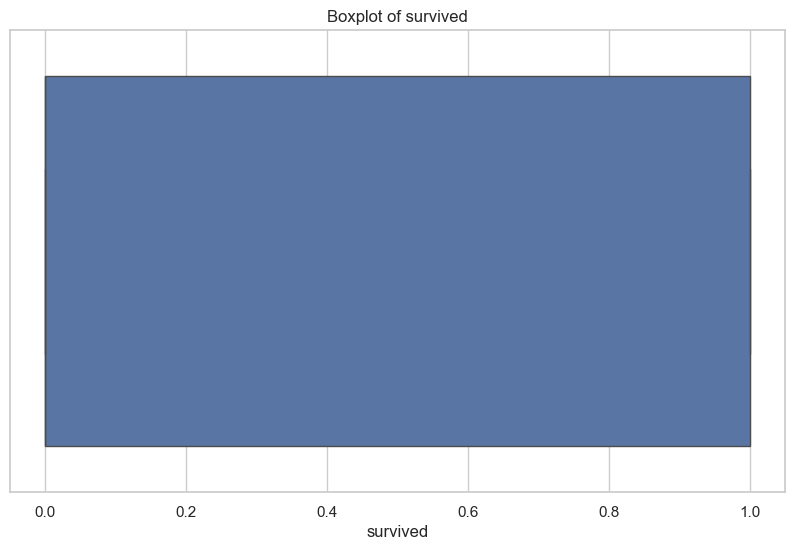

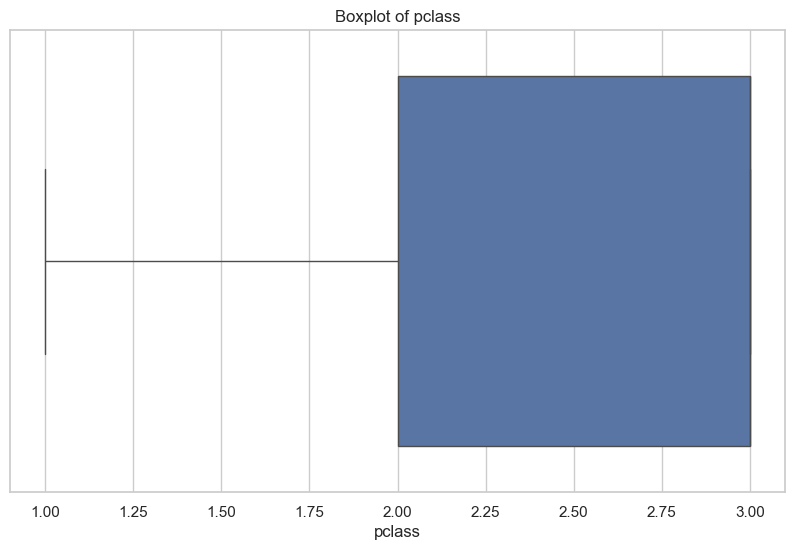

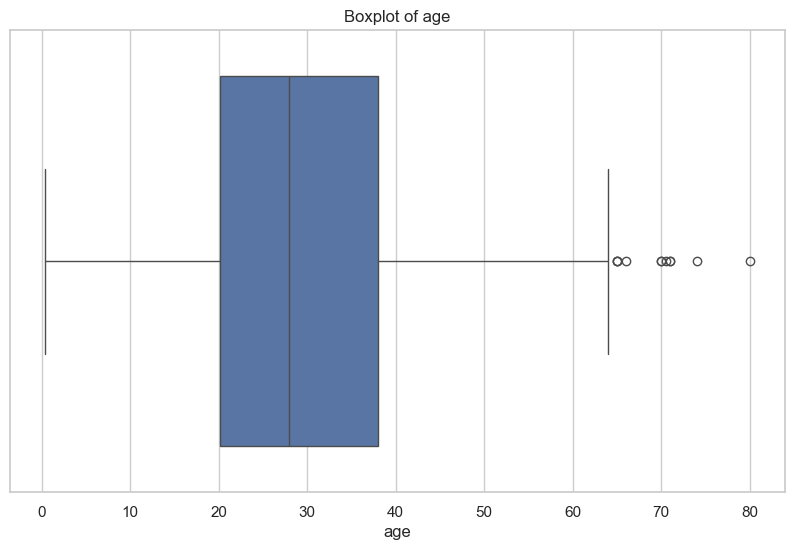

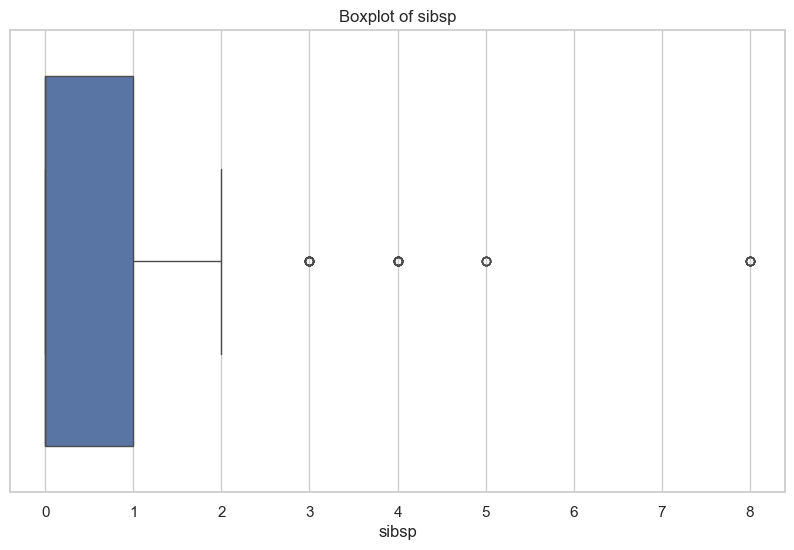

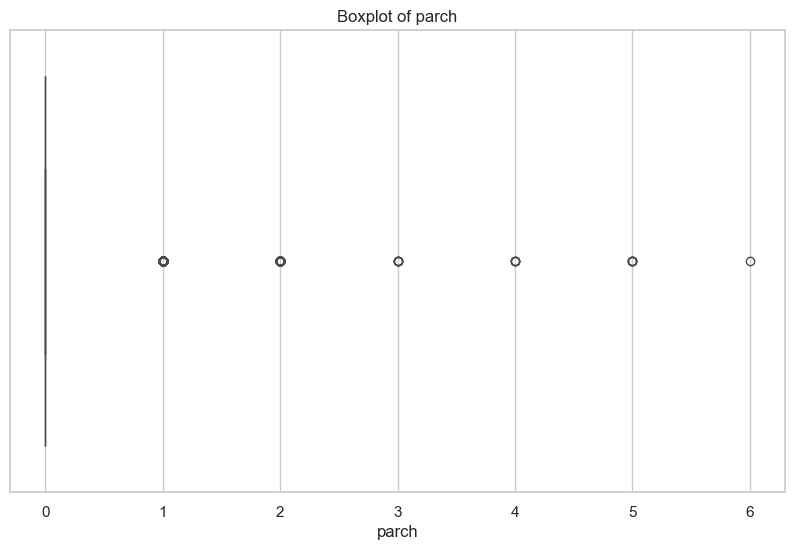

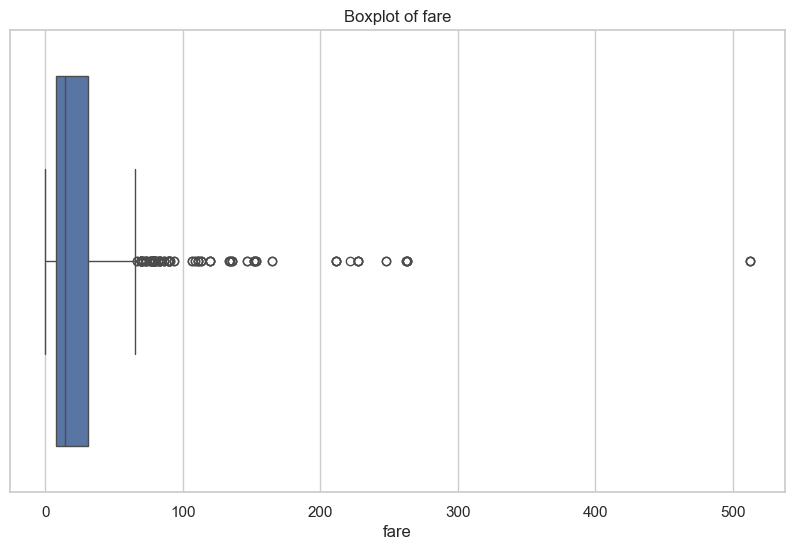

In [23]:
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'../figures/hist_{col}.png', bbox_inches='tight')
    plt.show()

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'../figures/box_{col}.png', bbox_inches='tight')
    plt.show()


### Observations
- `Age` shows a normal distribution centered around 30 years.
- `Fare` is right-skewed with some high-value outliers.
- Passenger count is higher in lower fare ranges.


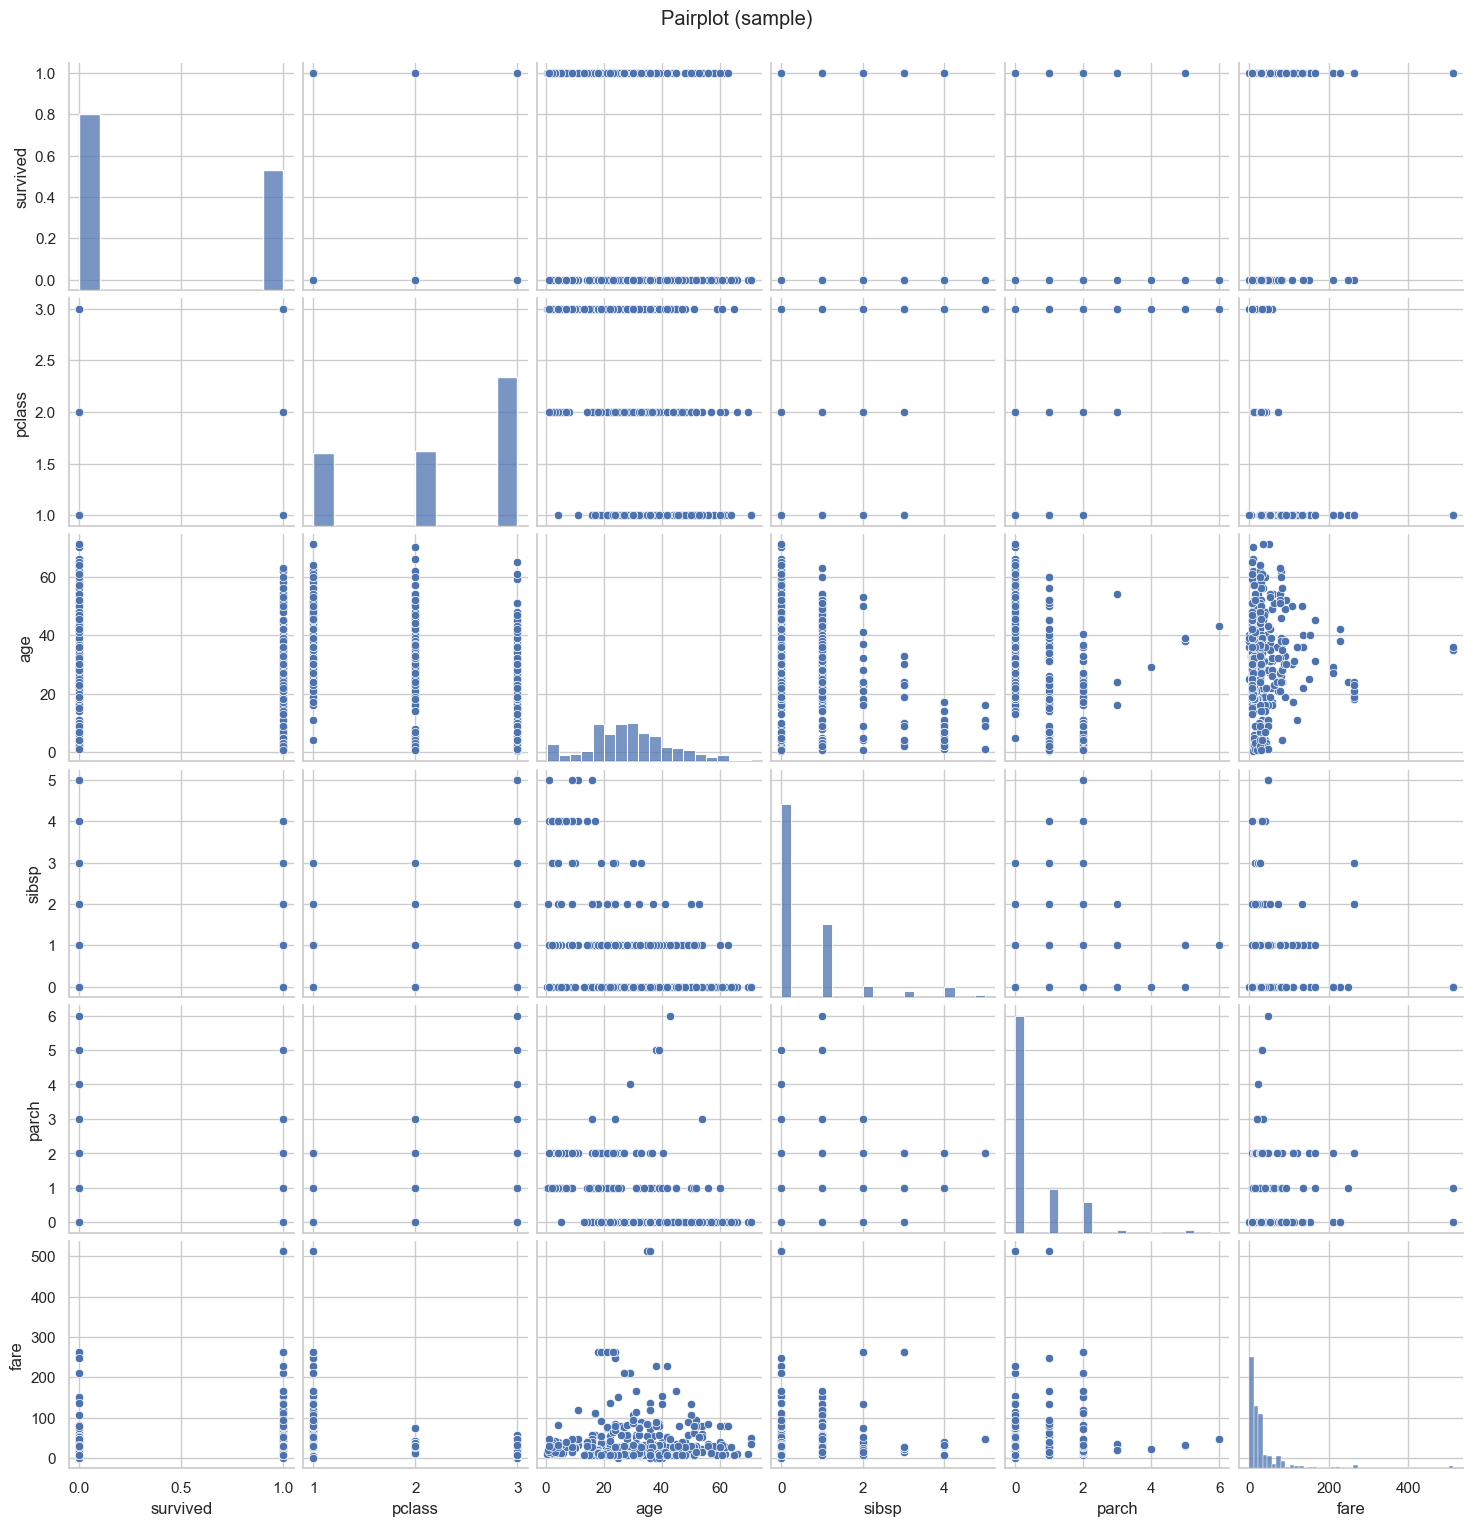

In [24]:
sample = df[num_cols].dropna().sample(n=min(500, len(df)), random_state=42)
sns.pairplot(sample)
plt.suptitle('Pairplot (sample)', y=1.02)
plt.savefig('../figures/pairplot_sample.png', bbox_inches='tight')
plt.show()


### Observations
- `Fare` shows moderate positive correlation with survival probability.
- Most other numerical variables have weak correlations with each other.


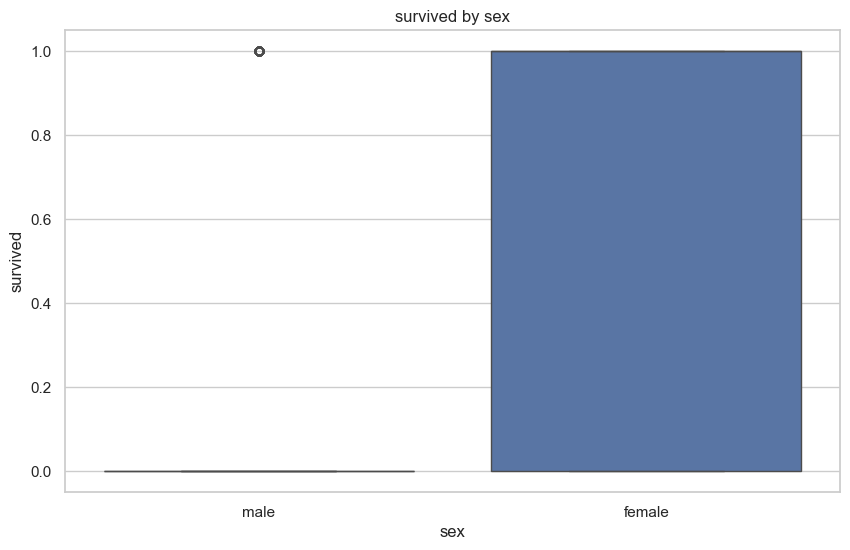

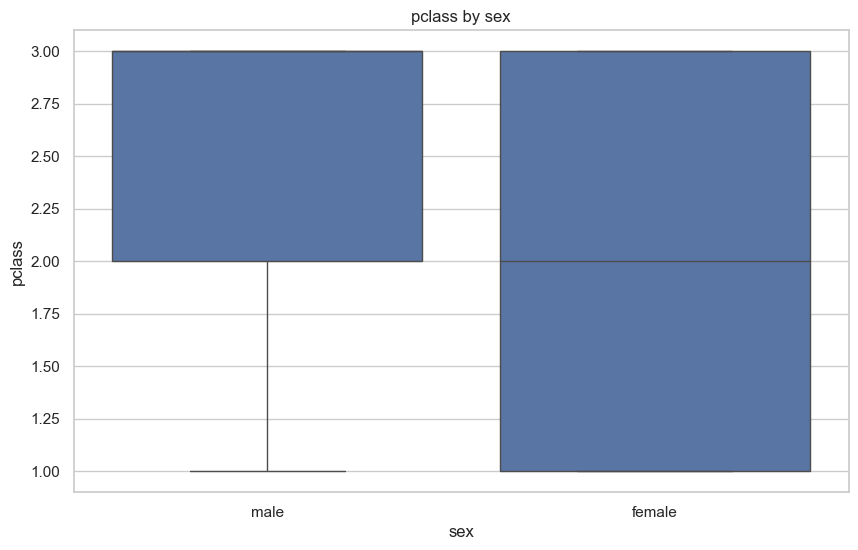

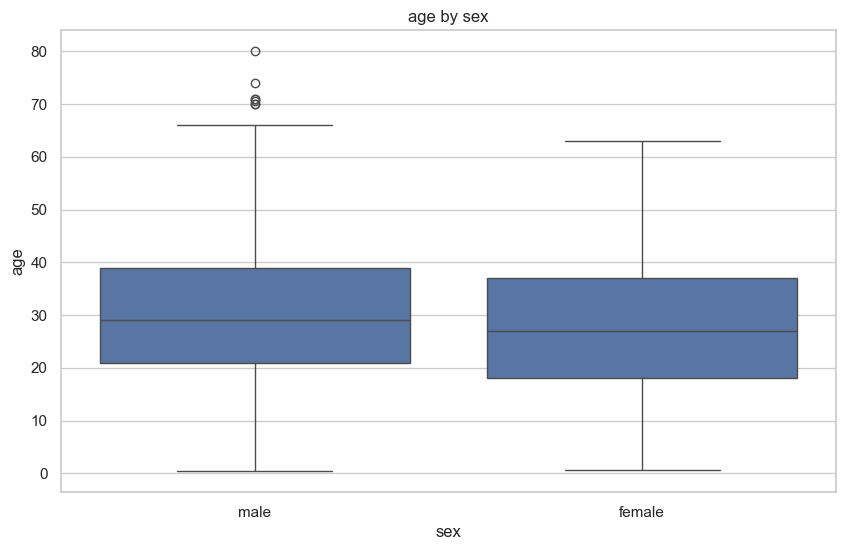

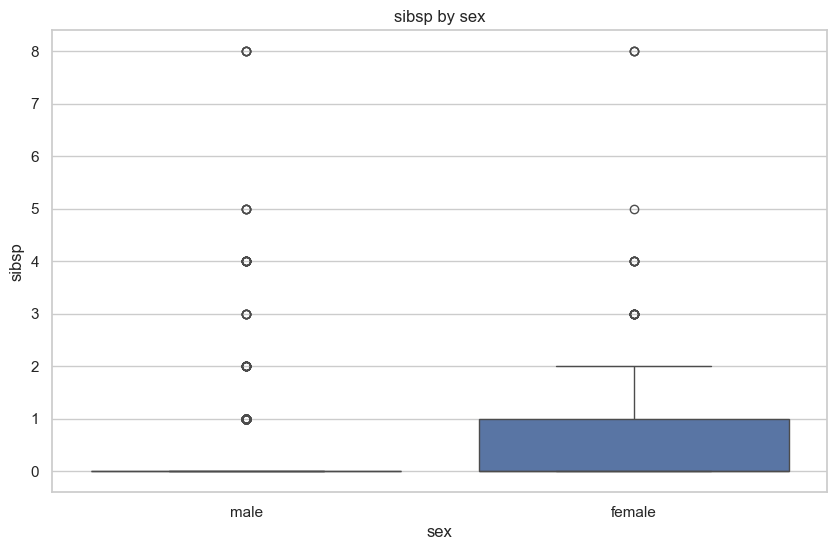

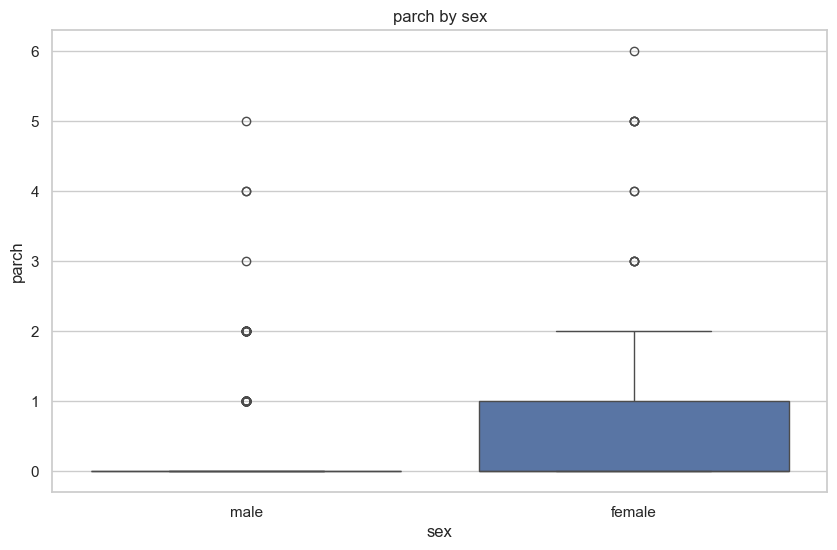

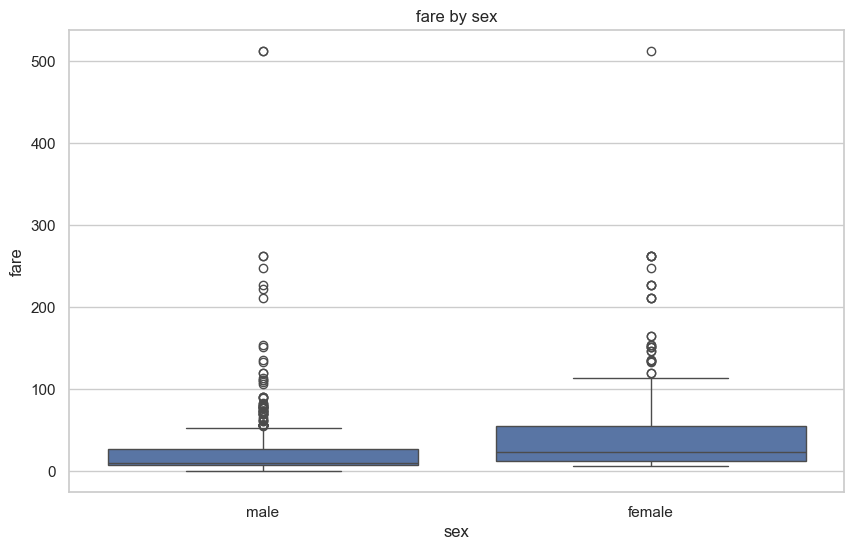

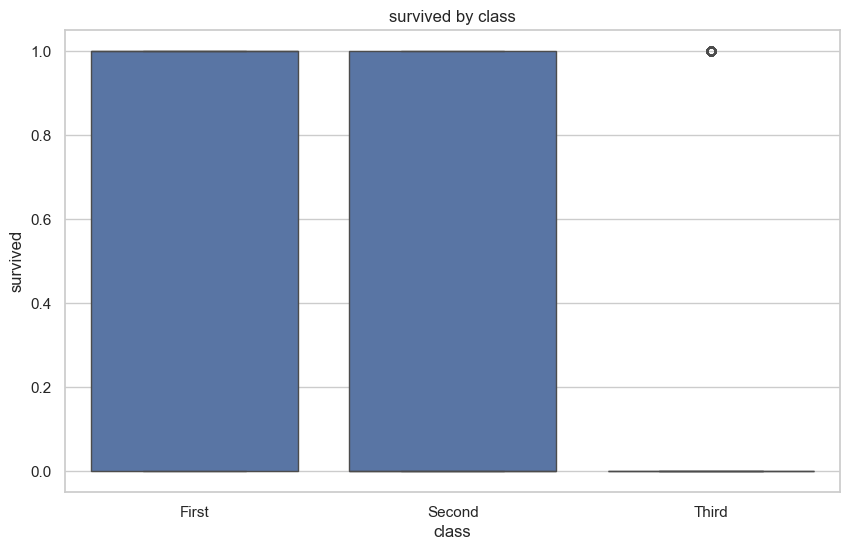

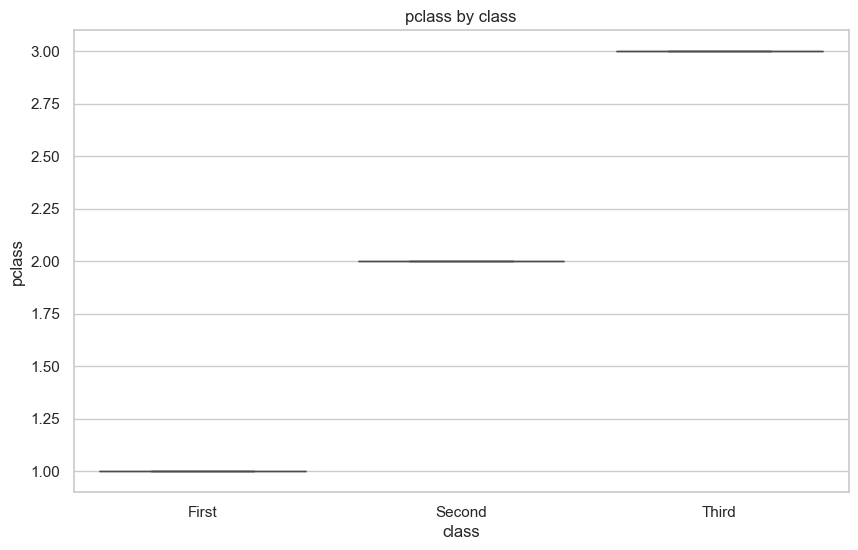

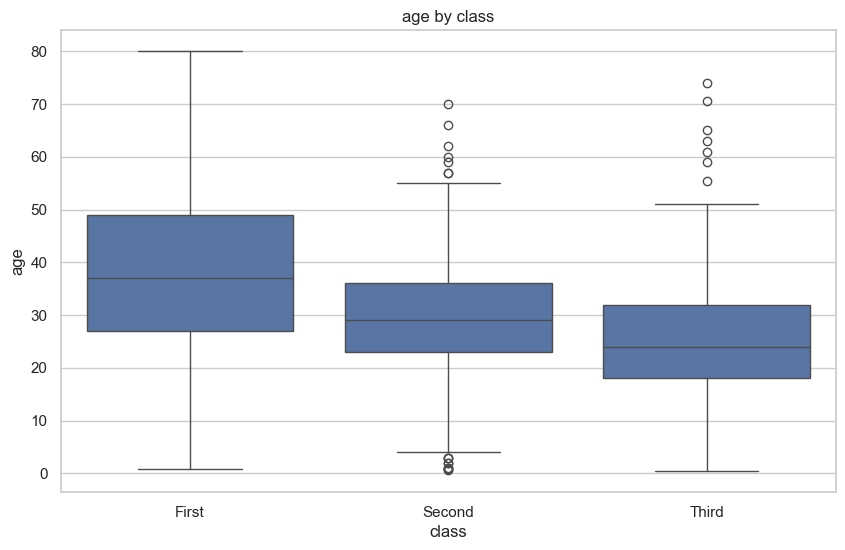

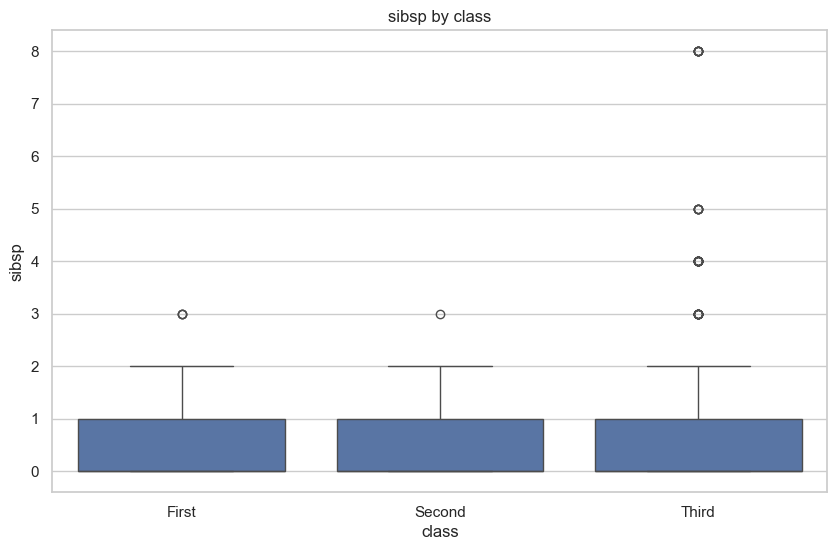

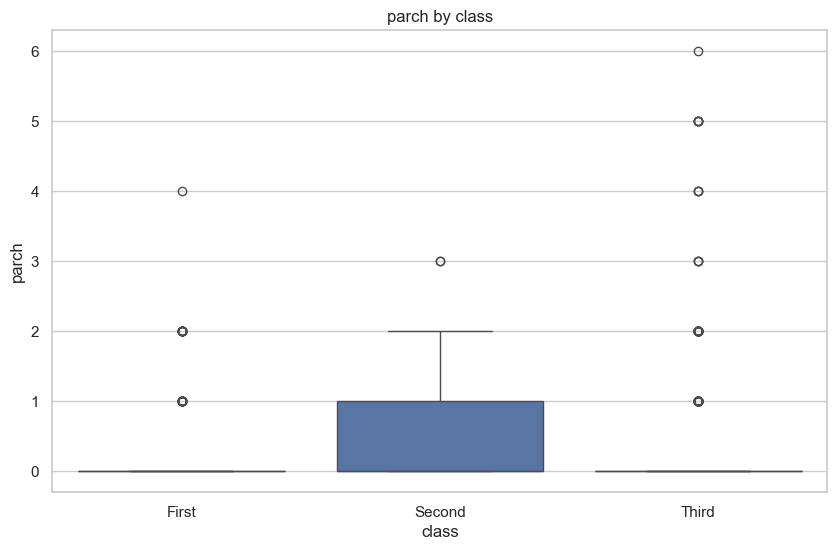

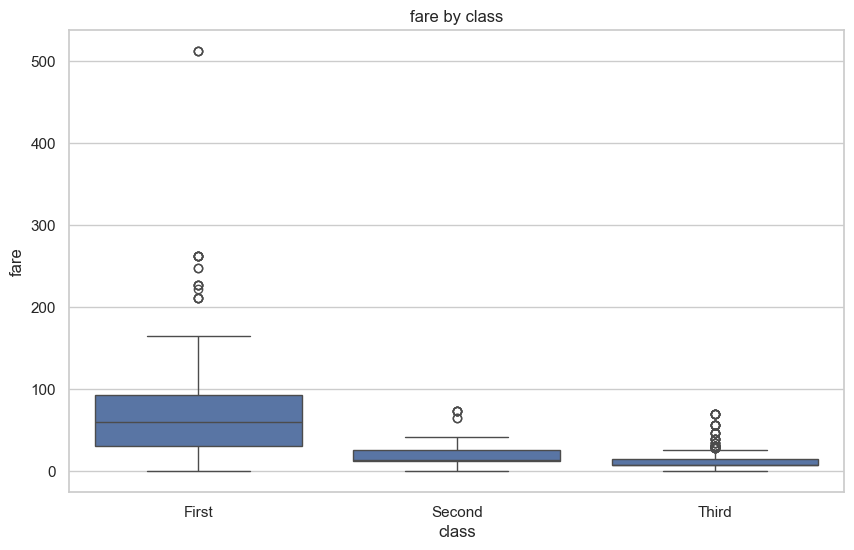

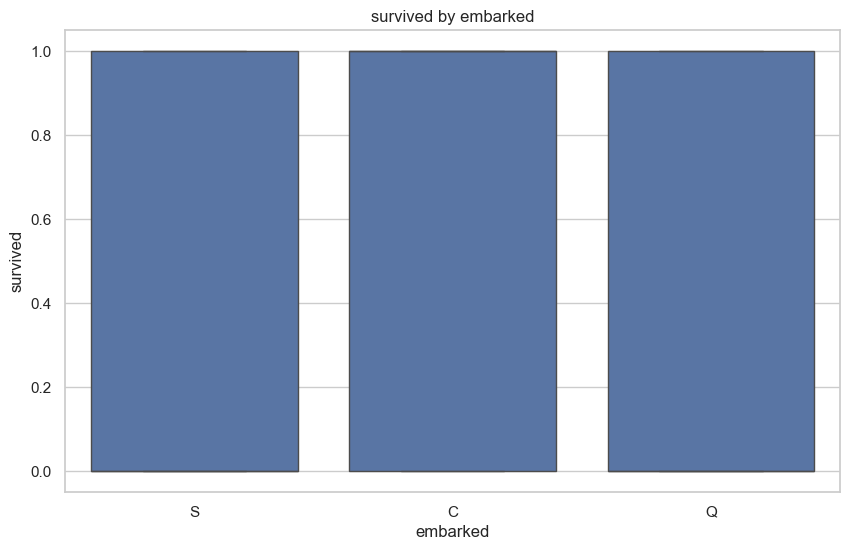

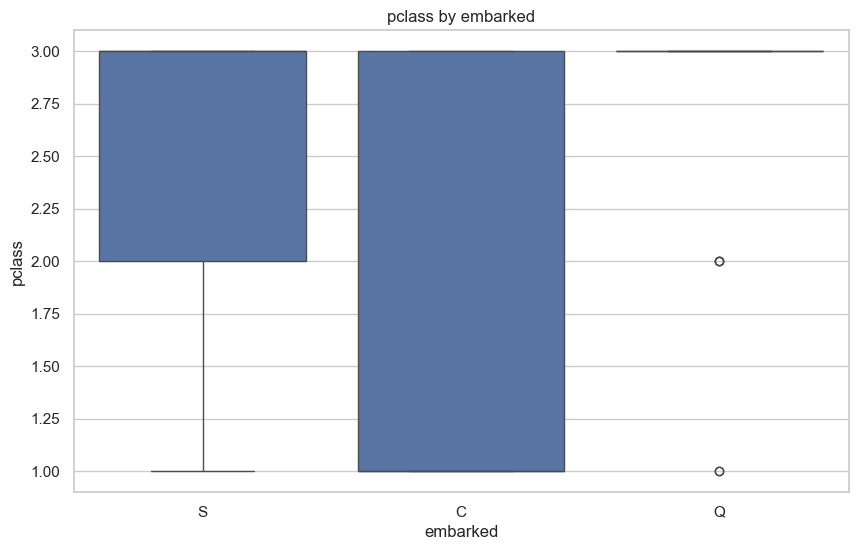

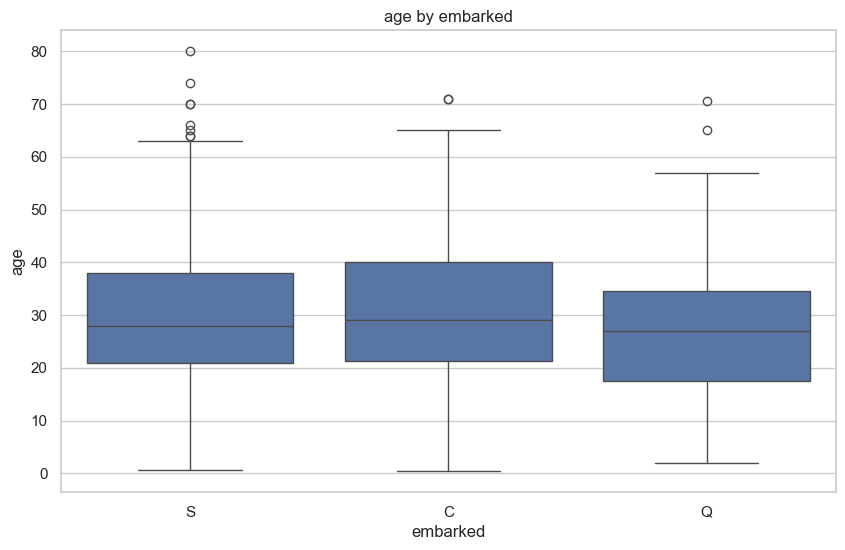

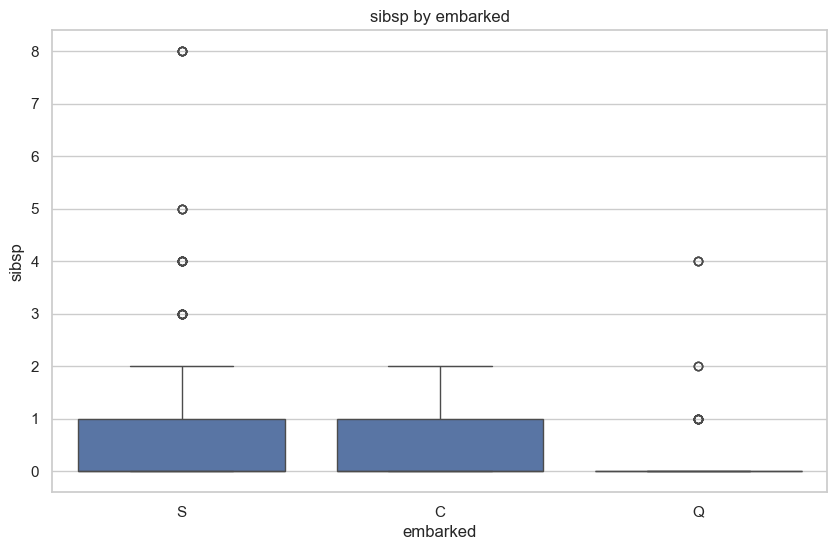

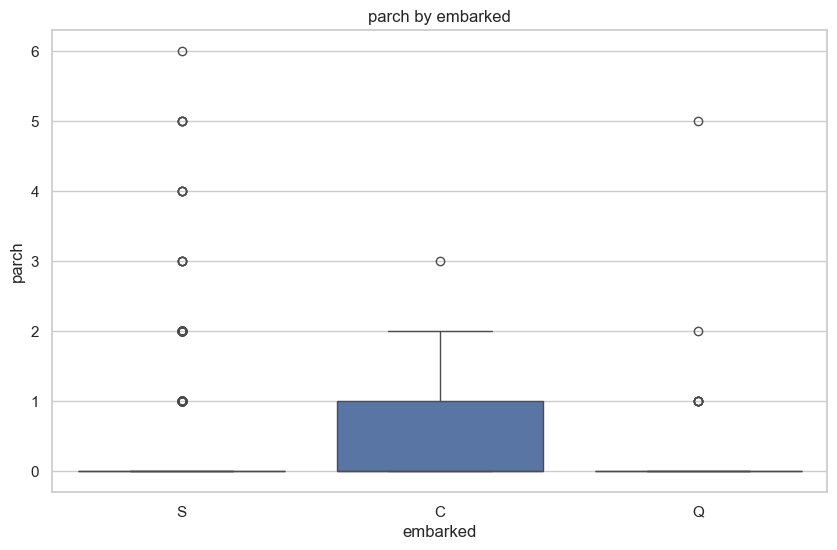

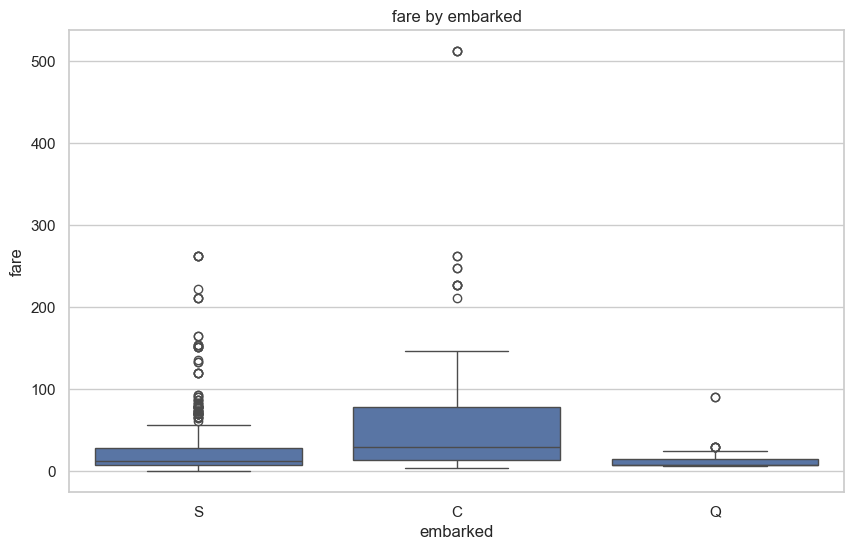

In [25]:
categorical_to_check = ['sex', 'class', 'embarked']
for cat in categorical_to_check:
    if cat in df.columns:
        for num in num_cols:
            plt.figure()
            sns.boxplot(x=df[cat], y=df[num])
            plt.title(f'{num} by {cat}')
            plt.savefig(f'../figures/{num}_by_{cat}.png', bbox_inches='tight')
            plt.show()


### Observations
- Higher-class passengers paid higher fares.
- Females generally had higher survival rates.
- Passengers from port 'C' had slightly higher average fares.


In [26]:
summary = {
    'Total Rows': len(df),
    'Total Columns': len(df.columns),
    'Missing Values': df.isnull().sum().sum(),
    'Duplicate Rows': df.duplicated().sum(),
    'Average Fare': round(df['fare'].mean(), 2) if 'fare' in df.columns else 'N/A',
    'Average Age': round(df['age'].mean(), 2) if 'age' in df.columns else 'N/A'
}

for k, v in summary.items():
    print(f"{k}: {v}")


Total Rows: 891
Total Columns: 15
Missing Values: 869
Duplicate Rows: 107
Average Fare: 32.2
Average Age: 29.7


### Key Insights
- Majority of passengers traveled in 3rd class and paid lower fares.
- Female passengers had a much higher survival rate than males.
- Higher class passengers showed a better chance of survival.
- Age and fare distributions indicate younger and wealthier travelers survived more often.
- Some columns such as `age`, `deck`, and `embarked` contain missing values that can be imputed.
- The dataset is clean enough to proceed to modeling and feature engineering.


### Conclusion
This exploratory analysis of the Titanic dataset helped understand the key factors affecting passenger survival. 
The data shows clear patterns across gender, class, and fare ranges. 
After handling missing values and understanding distributions, the dataset is ready for the next stage of machine learning — building predictive models to estimate survival probabilities.


### References
- Titanic Dataset: [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic)
- Seaborn Titanic Dataset Documentation
